# Redes Neuronales
## Trabajo Práctico N° 1 - Ejercicio 1
* Kammann, Lucas Agustín
* Gaytan, Joaquín Oscar

### Consultas y/o dudas
* Métricas del modelo (Matriz de confusión, exactitud, precisión, etc.)
* Procesamiento de los datos? (Filtrado)
* CountVectorizer, es necesario que lo hagamos a mano o podemos utilizar la librería de sci-kit-learn?
* Filtrado de numeros
* Filtrado de palabras

### Step by step
* Obtención del dataset (separando entre "train" y "test")
* Preprocesamiento de los datos
* Distribuciones condicionales (Verosimilitudes/Likelihood)
* Smoothing
* Probabilidad a Priori
* Clasificación (Naive Bayes Multinomial)
* Clasificación usando log posteriori
* Métricas

# Descripción del problema
Se desea armar un clasificador de correos electrónicos o noticias en función del tópico sobre el cual trata dicho correo electrónico o noticia, para ello, se modela el problema considerando una variable aleatoria discreta $X$ con distribución categórica de $k_x = 20$ categorías, siendo estas los tópicos posibles que pueden tratar los documentos clasificados.

$$X \sim Categorica(p_1, p_2, ..., p_{k_x})$$

Las características a analizar de los documentos para la clasificación, son las palabras. Se asume que el orden de las palabras no importa, que son independientes entre sí y que se encuentran identicamente distribuídas. De esta forma, se define una segunda variable aleatoria discreta $Y$ con distribución categórica de $k_y$ categorías, siendo estas las posibles palabras de nuestro vocabulario.

$$Y \sim Categorica(p_1, p_2, ..., p_{k_y})$$

# Preparación de la base de datos
Usamos la librería **sklearn** para descargar la base de datos de entrenamiento y de validación.

In [1]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np

# Loading the datasets
train = fetch_20newsgroups(subset='train', shuffle=True)
test = fetch_20newsgroups(subset='test', shuffle=True)

# Categories
categories = train.target_names

# Train dataset, casting to numpy array
train_data = np.array(train.data)
train_target = np.array(train.target)
train_size = len(train_data)

# Test dataset, casting to numpy array
test_data = np.array(test.data)
test_target = np.array(test.target)
test_size = len(test_data)

# Logging useful information
print(f'Dataset Train: {train_size} elements')
print(f'Dataset Test: {test_size} elements')

Dataset Train: 11314 elements
Dataset Test: 7532 elements


# Explorando la base de datos

## Observando un correo electrónico de forma aleatoria
Buscamos de forma aleatoria un elemento dentro de la base de datos de entrenamiento, con el objetivo de visualizar cómo suelen ser los correos electrónicos de noticias que se poseen, para tener una mejor comprensión de qué podemos llegar a encontrarnos dentro del vocabulario o el documento a analizar.

In [2]:
random_data = np.random.choice(train_data)
print(random_data)

From: jkeais@ucssun1.sdsu.edu (keais j)
Subject: Re: Pioneer Laser player
Article-I.D.: gondor.1pr8nn$46v
Organization: SDSU Computing Services
Lines: 17
NNTP-Posting-Host: ucssun1.sdsu.edu

In article <1993Apr6.005150.10250@ee.rochester.edu> neale@ee.rochester.edu (Reg Neale) writes:
>I'm trying to figure out how to operate a Pioneer Laserdisc LD-1000 that I bought at a surplus store. It is reputedly from some kind of computerised viewing
>and/or ordering system. THere is what may be an HPIB connector on the back. When
>I power it up, the front panel power light comes on, but no activity, and the
>door doesn't open. Anyone have any experience with this unit or any ideas on how
>to obtain documentation?

What you have is one of the LD players from a video game (Dragon's Lair,
Space Ace, etc). Call Pioneer Technicial Support 213-498-0300 (at least
that's the number I called them at) and ask for the LD-V1000 Interface
Guide. It shows how the parallel interface should be wired and the cod

## Categorías
Dentro de la base de datos, los correos electrónicos que podemos encontrar pueden tratar de diferentes tópicos, y estos tópicos son las categorías de la variable aleatoria definida $X$.

In [3]:
# Show the news categories
print(categories)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [4]:
import json

# Processing the categories tree
categories_tree = {}
for category in categories:
    # For each new category, the dot separated fields are converted into a list
    category_levels = category.split('.')
    
    # Iteration over each field that describes a category, to create the corresponding
    # tree path towards that node, each field should exist as a node in its corresponding level
    categories_tree_node = categories_tree
    for category_level in category_levels:
            # If current category level has not been created already
            if category_level not in categories_tree_node.keys():
                categories_tree_node[category_level] = {}
                
            # Enter the category level
            categories_tree_node = categories_tree_node[category_level]

# Showing the result in a graphical view
print(json.dumps(categories_tree, indent=6, sort_keys=True))

{
      "alt": {
            "atheism": {}
      },
      "comp": {
            "graphics": {},
            "os": {
                  "ms-windows": {
                        "misc": {}
                  }
            },
            "sys": {
                  "ibm": {
                        "pc": {
                              "hardware": {}
                        }
                  },
                  "mac": {
                        "hardware": {}
                  }
            },
            "windows": {
                  "x": {}
            }
      },
      "misc": {
            "forsale": {}
      },
      "rec": {
            "autos": {},
            "motorcycles": {},
            "sport": {
                  "baseball": {},
                  "hockey": {}
            }
      },
      "sci": {
            "crypt": {},
            "electronics": {},
            "med": {},
            "space": {}
      },
      "soc": {
            "religion": {
                  "christian": {

### TODO! Agregar labels para cada posible categoria, más lindo el histograma y explicar la PROBABILIDAD A PRIORI

# Histograma de tópicos
Se calcula y grafica el histograma de los tópicos de las noticias o correos electrónicos utilizando la librería **matplotlib**.

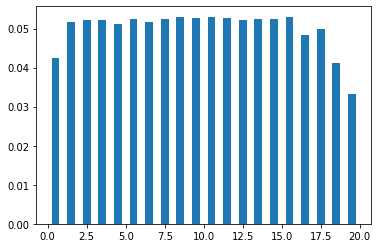

[0.04242531 0.05161747 0.05223617 0.05214778 0.05108715 0.05241294
 0.05170585 0.05250133 0.05285487 0.05276648 0.05303164 0.05258971
 0.05223617 0.05250133 0.05241294 0.05294326 0.04825879 0.04984974
 0.04109952 0.03332155]
Wall time: 846 ms


In [5]:
%%time
from matplotlib import pyplot as plt

# Histogram for the categories in the training set
priori, _, _ = plt.hist(train_target, bins=len(categories), range=(0,len(categories)), rwidth=0.5, density=True)
plt.show()
print(priori)

In [6]:
print(f'Shape of the priori probability distribution: {priori.shape}')

Shape of the priori probability distribution: (20,)


# Estimación de probabilidades a priori
Se computan las probabilidades a priori para las categorías, es decir, los tópicos. Se emplea una herramienta distinta a **matplotlib** para comparar el tiempo utilizada en el procesamiento. Se está estimando la siguiente función masa de probabilidad,
$$P(X=x) ; x = 0, 1, ..., 19$$

In [7]:
%%time

# For each category, filter the amount of occurences in the training dataset
# the compute the priori probability
priori_distribution = np.zeros(len(categories))
for index, category in enumerate(categories):
    frequency = (train_target == index).sum()
    priori_distribution[index] = frequency
priori_distribution /= priori_distribution.sum()

Wall time: 2 ms


### Preprocesamiento

In [8]:
%%time

from sklearn.feature_extraction.text import CountVectorizer

# Importing and testing the CountVectorizer class of sklearn
vectorizer = CountVectorizer(analyzer='word', stop_words='english', encoding='latin1')
feature_matrix = vectorizer.fit_transform(train_data)

Wall time: 7.92 s


In [9]:
print(feature_matrix.shape)

(11314, 129796)


## Estimación de distribución de probabilidad condicional

## Overfitting y Laplacian Smoothing
El **overfitting** es un problema que ocurre cuando el modelo utilizado no es capaz de predecir correctamente frente a datos nuevos que no se encontraban en el conjunto de entrenamiento, lo cual le quita capacidad de generalizar, un aspecto fundamental en la resolución de problemas de inteligencia artificial. En este caso, para resolver el problema descripto se propone emplear un clasificador naive bayes multinomial, que puede traer apareado un problema de overfitting que se ilustra a continuación,

### Discusiones sobre Laplacian Smoothing
* https://towardsdatascience.com/laplace-smoothing-in-na%C3%AFve-bayes-algorithm-9c237a8bdece
* https://medium.com/syncedreview/applying-multinomial-naive-bayes-to-nlp-problems-a-practical-explanation-4f5271768ebf
* https://stats.stackexchange.com/questions/108797/in-naive-bayes-why-bother-with-laplace-smoothing-when-we-have-unknown-words-in
* https://courses.cs.washington.edu/courses/cse446/20wi/Section7/naive-bayes.pdf

In [10]:
%%time

# Separate the matrix of documents (mails) and occurrences of words for each category
# and compute the normalized distribution to get the likelihood for each category
alpha = 0.01
categories_distribution = np.zeros((len(categories), len(vectorizer.vocabulary_.keys())), dtype=np.longdouble)
for index, category in enumerate(categories):
  category_matrix = feature_matrix[train_target == index][:]
  distribution = category_matrix.sum(axis=0) + alpha
  categories_distribution[index,:] = distribution / distribution.sum()

Wall time: 84.8 ms


In [11]:
print(categories_distribution.shape)
print(categories_distribution)

(20, 129796)
[[3.53108339e-05 3.98977229e-04 1.17311740e-07 ... 1.17311740e-07
  1.17311740e-07 1.17311740e-07]
 [3.96599761e-04 1.98358187e-04 1.16612691e-07 ... 1.16612691e-07
  1.16612691e-07 1.16612691e-07]
 [1.36640998e-04 4.14352131e-05 4.13938193e-08 ... 4.13938193e-08
  4.13938193e-08 4.13938193e-08]
 ...
 [2.26423180e-04 1.41306996e-03 6.92782224e-06 ... 6.85922994e-08
  6.85922994e-08 6.85922994e-08]
 [2.56058747e-04 6.40009741e-04 9.14169035e-08 ... 9.14169035e-08
  9.14169035e-08 9.14169035e-08]
 [5.75760952e-05 2.44231765e-04 1.43581285e-07 ... 1.43581285e-07
  1.43581285e-07 1.43581285e-07]]


## Calculando la prediccion con las probabilidades

In [12]:
%%time

# Data, target and vectorizer
input_size = 100
input_data = test_data[:input_size]
input_target = test_target[:input_size]
input_matrix = vectorizer.transform(input_data)

# Computing predictions for each input
predictions = np.zeros(input_matrix.shape[0], dtype=int)
for input_index in range(input_matrix.shape[0]):
    # Computing the posteriori probability
    # posteriori_unnormalized = ((categories_distribution * 10e3) ** input_matrix.toarray()[input_index]).prod(axis=1) * priori
    posteriori_unnormalized = ((categories_distribution) ** input_matrix.toarray()[input_index]).prod(axis=1) * priori
    posteriori_normalized = posteriori_unnormalized / posteriori_unnormalized.sum()

    # Choosing the maximum posteriori probability as the prediction
    predictions[input_index] = posteriori_unnormalized.argmax()

<timed exec>:13: RuntimeWarning: invalid value encountered in true_divide


Wall time: 5.41 s


In [13]:
# Computing the accuracy of the model
accuracy = (predictions == input_target).sum() / input_size
print(f'Accuracy obtained: {accuracy}')

Accuracy obtained: 0.4


# Calculando la predicción usando log probabilidades

In [14]:
%%time

# Log probabilities
log_priori = np.log(priori)
log_prob = np.log(categories_distribution)

# Data, target and vectorizer
input_size = test_size
input_data = test_data[:input_size]
input_target = test_target[:input_size]
input_matrix = vectorizer.transform(input_data)

Wall time: 6.92 s


In [15]:
%%time

# Computing the log posteriori probability
log_posteriori = np.dot(log_prob, input_matrix.todense().transpose()) + (log_priori.reshape(-1, 1) * np.ones(input_size))

Wall time: 1min 1s


In [16]:
%%time

# Choosing the maximum log posteriori probability as the prediction
predictions = np.zeros(input_matrix.shape[0], dtype=int)
for input_index in range(input_size):
    predictions[input_index] = log_posteriori[:,input_index].argmax()

Wall time: 77.8 ms


## Métricas

In [17]:
from sklearn import metrics

# Accuracy (Exactitud)
accuracy = metrics.accuracy_score(input_target, predictions)
print(f'Accuracy obtained: {accuracy}')

Accuracy obtained: 0.804567180031864


Text(0.5, 1.0, 'Matriz de Confusión')

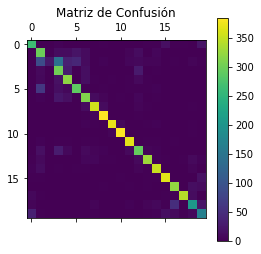

In [18]:
# Confusion Matrix
cmatrix = metrics.confusion_matrix(input_target, predictions)
plt.matshow(cmatrix)
plt.colorbar()
plt.title("Matriz de Confusión")

In [19]:
# Precision
precision = metrics.precision_score(input_target, predictions, average=None)
print(precision)

[0.81538462 0.56653992 0.80645161 0.54039497 0.73165138 0.79614325
 0.75544794 0.87073171 0.91428571 0.9562982  0.95771144 0.90220049
 0.75968992 0.88203753 0.86519608 0.8997555  0.81360202 0.96901408
 0.75182482 0.6733871 ]


In [20]:
# Recall
recall = metrics.recall_score(input_target, predictions, average=None)
print(recall)

[0.830721   0.76606684 0.06345178 0.76785714 0.82857143 0.73164557
 0.8        0.90151515 0.96482412 0.93702771 0.96491228 0.93181818
 0.7480916  0.83080808 0.89593909 0.92462312 0.88736264 0.91489362
 0.66451613 0.66533865]


In [21]:
# F1 score
f1 = metrics.f1_score(input_target, predictions, average=None)
print(f1)

[0.82298137 0.65136612 0.11764706 0.63435195 0.7771011  0.76253298
 0.77708593 0.88585608 0.93887531 0.94656489 0.96129838 0.91677019
 0.75384615 0.8556567  0.88029925 0.91201983 0.84888305 0.94117647
 0.70547945 0.66933868]


In [22]:
print(metrics.classification_report(input_target, predictions))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       319
           1       0.57      0.77      0.65       389
           2       0.81      0.06      0.12       394
           3       0.54      0.77      0.63       392
           4       0.73      0.83      0.78       385
           5       0.80      0.73      0.76       395
           6       0.76      0.80      0.78       390
           7       0.87      0.90      0.89       396
           8       0.91      0.96      0.94       398
           9       0.96      0.94      0.95       397
          10       0.96      0.96      0.96       399
          11       0.90      0.93      0.92       396
          12       0.76      0.75      0.75       393
          13       0.88      0.83      0.86       396
          14       0.87      0.90      0.88       394
          15       0.90      0.92      0.91       398
          16       0.81      0.89      0.85       364
          17       0.97    